In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [63]:
df = pd.read_csv(r'C:\Users\ASUS\Downloads\Creditcard_data.csv')


In [65]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,575,-0.572263,0.731748,1.541254,0.150506,1.108974,0.372152,1.084879,-0.146329,-0.274447,...,-0.143508,-0.107582,-0.418263,-0.731029,0.877525,-0.364150,-0.177509,-0.256545,26.72,0
768,579,-1.296845,-0.511605,2.404726,-0.310762,-0.319551,-0.542842,-0.173310,0.260423,-1.202688,...,-0.071270,-0.161175,0.088496,0.285390,0.281069,-0.370130,0.043410,0.092318,80.00,0
769,579,1.214170,0.210481,0.484651,0.479768,-0.261955,-0.527039,0.021782,-0.106888,-0.037631,...,-0.224292,-0.594609,0.159877,0.091873,0.140964,0.227406,-0.017389,0.016030,5.98,0
770,580,1.267030,-0.071114,0.037680,0.512683,0.242392,0.705212,-0.226582,0.109483,0.657565,...,-0.164468,-0.177225,-0.222918,-1.245505,0.678360,0.525059,0.002920,-0.003333,12.36,0


In [67]:
df.info

<bound method DataFrame.info of      Time        V1        V2        V3        V4        V5        V6  \
0       0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1       0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2       1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
..    ...       ...       ...       ...       ...       ...       ...   
767   575 -0.572263  0.731748  1.541254  0.150506  1.108974  0.372152   
768   579 -1.296845 -0.511605  2.404726 -0.310762 -0.319551 -0.542842   
769   579  1.214170  0.210481  0.484651  0.479768 -0.261955 -0.527039   
770   580  1.267030 -0.071114  0.037680  0.512683  0.242392  0.705212   
771   581  1.153758  0.132273  0.382969  1.405063 -0.224287 -0.197295   

           V7        V8        V9  ...       V21       V22       V23  \
0    0.239599  0.09

In [69]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,...,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000
mean,283.005181,-0.176963,0.217169,0.875172,0.285628,-0.005029,0.159081,0.123329,-0.057547,-0.030384,...,0.004888,-0.096995,-0.040344,-0.002501,0.114337,0.022782,0.023353,-0.017045,68.668290,0.011658
std,171.834196,1.294724,1.173401,1.031878,1.258758,1.098143,1.225682,0.852075,0.830144,0.878183,...,0.609335,0.607228,0.358724,0.621507,0.429667,0.484227,0.300934,0.278332,197.838269,0.107411
min,0.000000,-6.093248,-12.114213,-5.694973,-4.657545,-6.631951,-3.498447,-4.925568,-7.494658,-2.770089,...,-4.134608,-2.776923,-3.553381,-1.867208,-1.389079,-1.243924,-2.377933,-2.735623,0.000000,0.000000
25%,126.500000,-0.896416,-0.174684,0.308677,-0.460058,-0.534567,-0.630717,-0.296289,-0.167880,-0.517068,...,-0.213746,-0.525289,-0.176915,-0.379766,-0.166227,-0.313631,-0.047868,-0.033083,5.987500,0.000000
50%,282.000000,-0.382618,0.285843,0.905435,0.395919,-0.116612,-0.109581,0.116329,0.034755,-0.082270,...,-0.075802,-0.076551,-0.048353,0.091886,0.143723,-0.026414,0.023199,0.021034,16.665000,0.000000
75%,432.000000,1.110739,0.885745,1.532969,1.117559,0.452818,0.482972,0.575390,0.252395,0.412261,...,0.095149,0.307438,0.070085,0.426339,0.425798,0.260408,0.112199,0.087023,55.527500,0.000000
max,581.000000,1.586093,5.267376,3.772857,4.075817,7.672544,5.122103,4.808426,2.134599,5.459274,...,5.273420,1.574750,3.150413,1.215279,1.136720,3.087444,2.490503,1.575380,3828.040000,1.000000


In [71]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [73]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

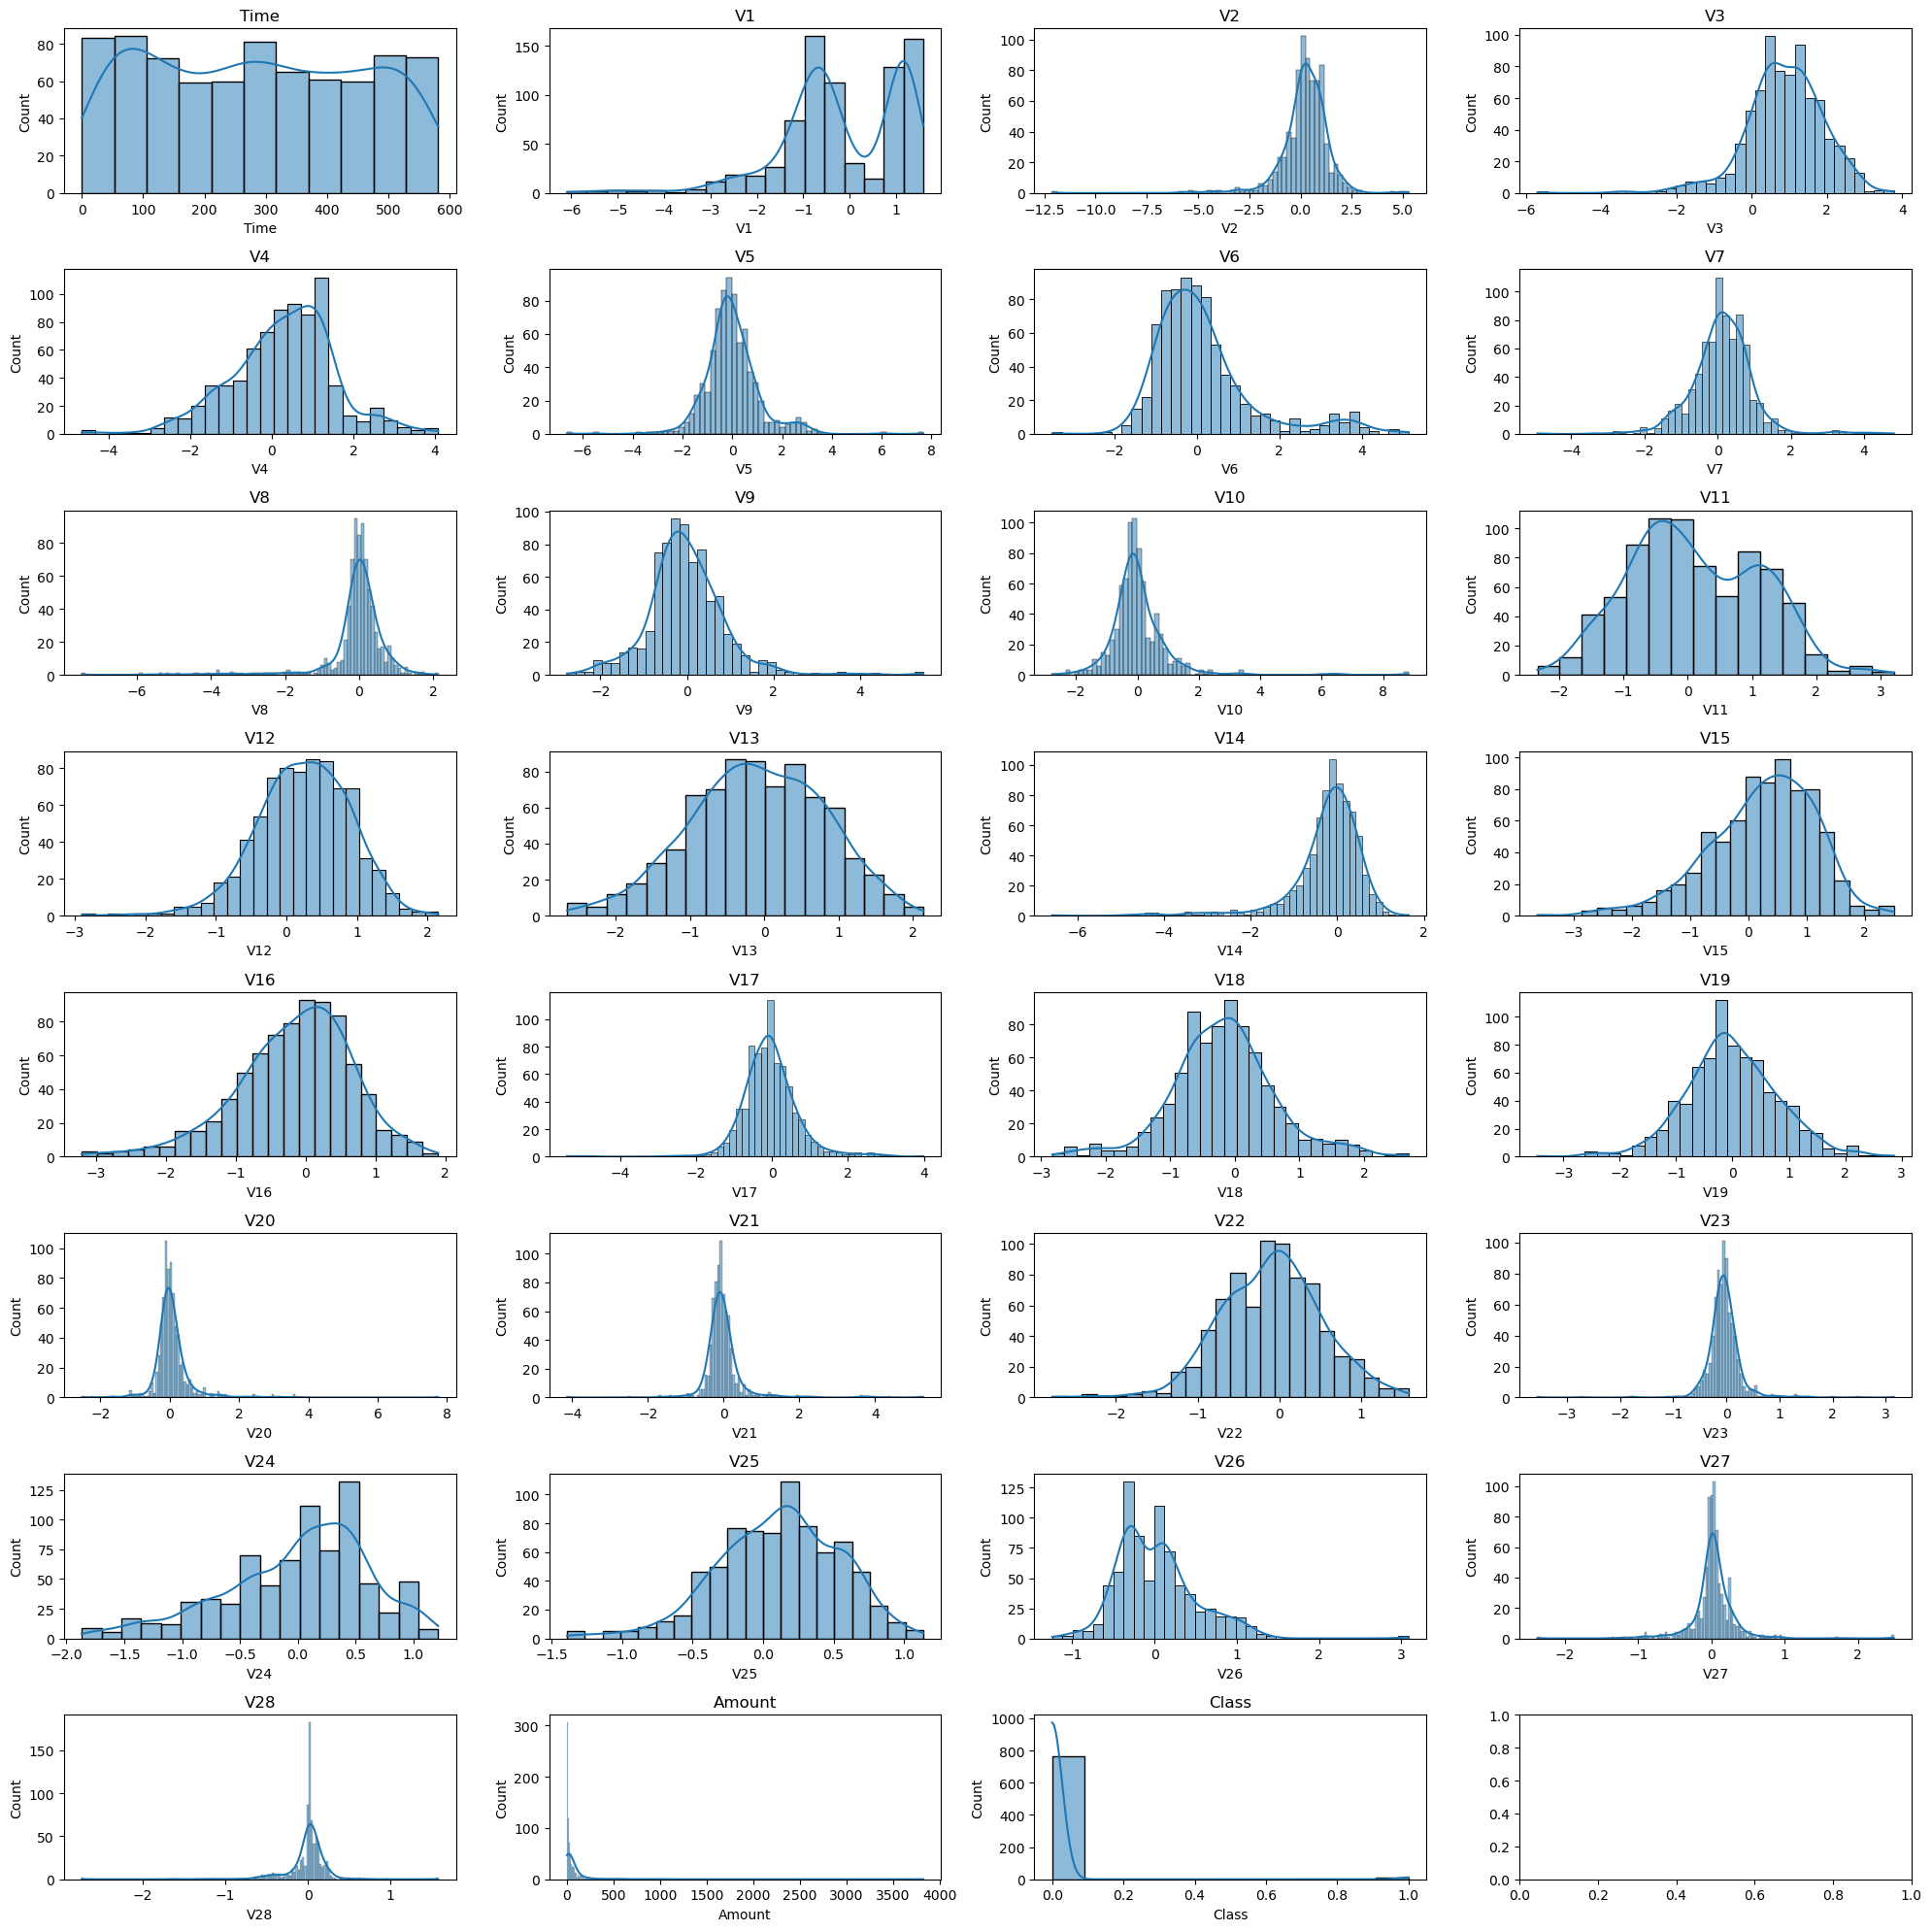

In [75]:
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=8, ncols=4, figsize=(20, 20))
axes = axes.flatten()

# Plot distribution curves for each column
for idx, col in enumerate(df.columns):
    if df[col].dtype != 'object':  # Only plot numerical columns
        sns.histplot(df[col], kde=True, ax=axes[idx])
        axes[idx].set_title(col)

# Adjust layout
plt.tight_layout()
plt.show()

In [76]:


# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Apply SMOTE to the entire dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Display the class distribution before and after resampling
print("Class distribution before resampling:")
print(y.value_counts())

print("Class distribution after resampling:")
print(pd.Series(y_resampled).value_counts())


Class distribution before resampling:
Class
0    763
1      9
Name: count, dtype: int64
Class distribution after resampling:
Class
0    763
1    763
Name: count, dtype: int64


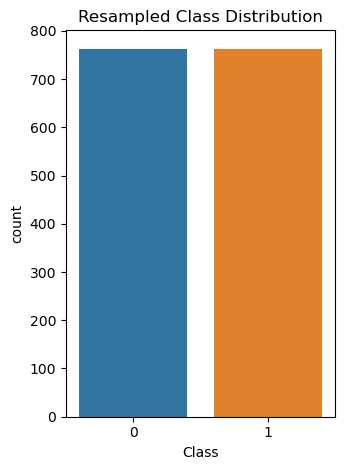

In [77]:
# Plot the resampled class distribution
plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled)
plt.title('Resampled Class Distribution')

# Show the plots
plt.tight_layout()
plt.show()

In [78]:
# Recombining to single dataset
resampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Class'])], axis=1)

# Display the first few rows of the resampled dataset
print("\nResampled Dataset:")
print(resampled_df.head())


Resampled Dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26 

In [79]:
resampled_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,...,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000
mean,334.943644,-0.476209,0.091908,0.769480,0.673627,0.305853,-0.182999,-0.177075,0.120121,-0.188538,...,0.043196,-0.072814,0.004417,-0.102767,-0.001005,0.083706,0.004185,-0.038810,51.455161,0.500000
std,175.534080,1.282471,1.175854,1.003772,1.246164,1.002417,1.018344,0.942655,0.685239,0.882367,...,0.473600,0.560352,0.350791,0.573216,0.448331,0.399154,0.240401,0.220334,159.006425,0.500164
min,0.000000,-6.093248,-12.114213,-5.694973,-4.657545,-6.631951,-3.498447,-4.925568,-7.494658,-2.770089,...,-4.134608,-2.776923,-3.553381,-1.867208,-1.389079,-1.243924,-2.377933,-2.735623,0.000000,0.000000
25%,172.000000,-1.405005,-0.322265,0.267731,0.084919,-0.329608,-0.897522,-0.705147,-0.106199,-0.517364,...,-0.182613,-0.488530,-0.184331,-0.441226,-0.218342,-0.212143,-0.091818,-0.123704,1.129283,0.000000
50%,368.500000,-0.549520,0.313895,0.762535,0.605094,0.192983,-0.350597,0.049397,0.098612,-0.098880,...,-0.033385,-0.100692,-0.014469,0.016247,0.078975,0.094705,-0.000534,0.004382,2.689859,0.500000
75%,494.000000,0.791839,0.747228,1.458619,1.214750,0.892132,0.202511,0.370830,0.406207,0.268122,...,0.192047,0.297283,0.137796,0.331315,0.258872,0.235449,0.107988,0.046788,29.135000,1.000000
max,581.000000,1.586093,5.267376,3.772857,4.075817,7.672544,5.122103,4.808426,2.134599,5.459274,...,5.273420,1.574750,3.150413,1.215279,1.136720,3.087444,2.490503,1.575380,3828.040000,1.000000


In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# 1. Simple Random Sampling
sample1 = resampled_df.iloc[np.random.choice(len(resampled_df), size=int(0.2 * len(resampled_df)), replace=False)]

# 2. Stratified Sampling
strata = resampled_df.groupby('Class')
sample2 = strata.apply(lambda x: x.sample(int(0.2 * len(x)), random_state=42)).reset_index(drop=True)

# 3. Systematic Sampling
k = len(resampled_df) // int(0.2 * len(resampled_df))
start = np.random.randint(0, k)
sample3 = resampled_df.iloc[start::k]

# 4. Cluster Sampling
num_clusters = 5
cluster_labels = np.arange(len(resampled_df)) % num_clusters
resampled_df['Cluster'] = cluster_labels
selected_cluster = np.random.choice(num_clusters)
sample4 = resampled_df[resampled_df['Cluster'] == selected_cluster].drop('Cluster', axis=1)

# 5. Bootstrapping
sample5 = resampled_df.iloc[np.random.choice(len(resampled_df), size=int(0.2 * len(resampled_df)), replace=True)]

# Print the lengths of the samples
print(f"Sample 1 (Random Sampling) size: {len(sample1)}")
print(f"Sample 2 (Stratified Sampling) size: {len(sample2)}")
print(f"Sample 3 (Systematic Sampling) size: {len(sample3)}")
print(f"Sample 4 (Cluster Sampling) size: {len(sample4)}")
print(f"Sample 5 (Bootstrapping) size: {len(sample5)}")

# Display the first few rows of each sample to verify
print("\nSample 1 (Random Sampling):")
print(sample1.head())

print("\nSample 2 (Stratified Sampling):")
print(sample2.head())

print("\nSample 3 (Systematic Sampling):")
print(sample3.head())

print("\nSample 4 (Cluster Sampling):")
print(sample4.head())

print("\nSample 5 (Bootstrapping):")
print(sample5.head())


Sample 1 (Random Sampling) size: 305
Sample 2 (Stratified Sampling) size: 304
Sample 3 (Systematic Sampling) size: 305
Sample 4 (Cluster Sampling) size: 305
Sample 5 (Bootstrapping) size: 305

Sample 1 (Random Sampling):
      Time        V1        V2        V3        V4        V5        V6  \
37      27 -1.452187  1.765124  0.611669  1.176825 -0.445980  0.246826   
468    344 -3.495984 -4.088420  2.024845 -0.740363  1.128135 -1.231702   
1505   473 -0.880318  0.395219  1.705649  0.188655  0.945963 -0.882557   
778    458 -2.087408  1.207652 -0.513709  2.173728  0.043267 -0.981820   
586    439 -0.142562  0.995908  1.348949  0.651922  0.402290 -0.141452   

            V7        V8        V9  ...       V21       V22       V23  \
37   -0.257566  1.092472 -0.607524  ...  0.082280  0.325782 -0.069107   
468  -0.086554  0.157807  1.677621  ...  0.361562 -0.173006  1.280446   
1505  0.857433 -0.151144 -0.144671  ...  0.059771  0.260645 -0.249871   
778  -1.437497  0.901365 -1.675262  ...  0

In [81]:

# Define the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}



In [82]:

# Define the function to evaluate models
def evaluate_models(X_train, y_train, X_test, y_test, models):
    accuracy_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy_scores[name] = accuracy_score(y_test, y_pred)
    return accuracy_scores
    
# Define the function to find the best model
def find_best_model(accuracy_scores):
    best_model_name = max(accuracy_scores, key=accuracy_scores.get)
    best_accuracy = accuracy_scores[best_model_name]
    return best_model_name, best_accuracy

# Create the samples
def create_samples(df):
    samples = []
    
    # 1. Simple Random Sampling
    sample1 = df.iloc[np.random.choice(len(df), size=int(0.2 * len(df)), replace=False)]
    samples.append(sample1)

    # 2. Stratified Sampling
    strata = df.groupby('Class')
    sample2 = strata.apply(lambda x: x.sample(int(0.2 * len(x)), random_state=42)).reset_index(drop=True)
    samples.append(sample2)
    
    # 3. Systematic Sampling
    k = len(df) // int(0.2 * len(df))
    start = np.random.randint(0, k)
    sample3 = df.iloc[start::k]
    samples.append(sample3)
    
    # 4. Cluster Sampling
    num_clusters = 5
    cluster_labels = np.arange(len(df)) % num_clusters
    df['Cluster'] = cluster_labels
    selected_cluster = np.random.choice(num_clusters)
    sample4 = df[df['Cluster'] == selected_cluster].drop('Cluster', axis=1)
    samples.append(sample4)
    
    # 5. Bootstrapping
    sample5 = df.iloc[np.random.choice(len(df), size=int(0.2 * len(df)), replace=True)]
    samples.append(sample5)
    
    return samples

# Create the samples
samples = create_samples(resampled_df)



In [83]:

# Evaluate each sample with the defined models and find the best model
for idx, sample in enumerate(samples):
    X = sample.drop('Class', axis=1)
    y = sample['Class']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    print(f"\nSample {idx + 1} Accuracy Scores:")
    scores = evaluate_models(X_train, y_train, X_test, y_test, models)
    for model_name, score in scores.items():
        print(f"{model_name}: {score:.4f}")
    
    best_model_name, best_accuracy = find_best_model(scores)
    print(f"Best Model for Sample {idx + 1}: {best_model_name} with accuracy {best_accuracy:.4f}")


Sample 1 Accuracy Scores:
Logistic Regression: 0.9180
Decision Tree: 0.9180
Random Forest: 0.9836
SVM: 0.7213
KNN: 0.7705
Best Model for Sample 1: Random Forest with accuracy 0.9836

Sample 2 Accuracy Scores:
Logistic Regression: 0.9180
Decision Tree: 0.9016
Random Forest: 0.9344
SVM: 0.7541
KNN: 0.7377
Best Model for Sample 2: Random Forest with accuracy 0.9344

Sample 3 Accuracy Scores:
Logistic Regression: 1.0000
Decision Tree: 0.9016
Random Forest: 0.9836
SVM: 0.6885
KNN: 0.7541
Best Model for Sample 3: Logistic Regression with accuracy 1.0000

Sample 4 Accuracy Scores:
Logistic Regression: 0.7869
Decision Tree: 0.8525
Random Forest: 0.9508
SVM: 0.6557
KNN: 0.7049
Best Model for Sample 4: Random Forest with accuracy 0.9508

Sample 5 Accuracy Scores:
Logistic Regression: 0.9180
Decision Tree: 0.9344
Random Forest: 1.0000
SVM: 0.7377
KNN: 0.8033
Best Model for Sample 5: Random Forest with accuracy 1.0000
